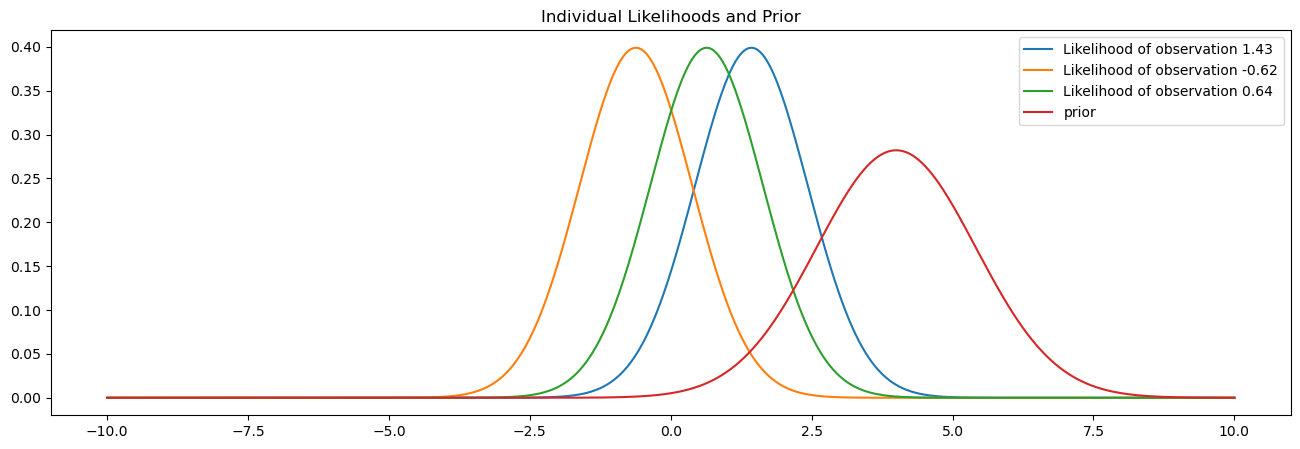

In [1]:
#Question 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

plt.figure(figsize=(16, 5))
for xi in x:
    individual_likelihood = stats.norm.pdf(parameter_domain, loc=xi, scale=1)
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {xi:.2f}")

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
plt.plot(parameter_domain, prior, label="prior")

plt.legend()
plt.title("Individual Likelihoods and Prior")
plt.show()

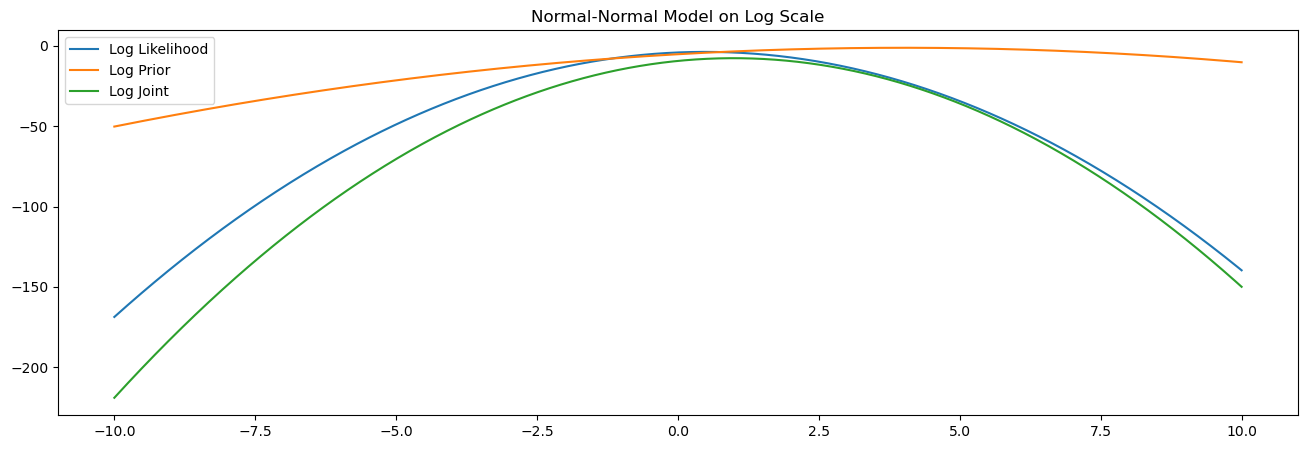

In [2]:
#Question 2
log_likelihood = stats.norm.logpdf((x[:, np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).sum(axis=0)
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = log_likelihood + log_prior  

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihood, label="Log Likelihood")
plt.plot(parameter_domain, log_prior, label="Log Prior")
plt.plot(parameter_domain, log_joint, label="Log Joint")

plt.legend()
plt.title("Normal-Normal Model on Log Scale")
plt.show()

## Question 3
By Bayes' Theorem, the posterior distribution is proportional to the product of the likelihood and the prior: $p(\theta | x) \propto \mathcal{N}(x | \theta, \sigma^2) \times 1$. The formula for the posterior distribution is: $\theta | x \sim \mathcal{N}(\bar{x}, \frac{\sigma^2}{n})$, where $\bar{x}$ is the sample mean and n is the number of observations.

## Question 4
In Bayesian statistics, log likelihoods and posteriors are interrelated, but their relationship can be complicated by improper priors and marginal likelihood constants. Log likelihoods are often used for numerical stability and ease of calculation. Posteriors usually combine priors and likelihoods. However, with improper priors (priors not integrating to 1), this relationship may be disrupted. Improper priors can lead to undefined or improper posteriors, especially when the normalizing constant (marginal likelihood) fails to render the posterior a valid probability distribution. While log likelihoods remain crucial for understanding data under a model, the presence of improper priors necessitates careful consideration in Bayesian analysis, as it may challenge the traditional interpretation and application of the posterior distribution.